<a href="https://colab.research.google.com/github/MamadouBousso/IAProjects/blob/master/EmergencyPart1MLPEarlyStopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Etapes de modelisation et early stopping


---


* Chargement des données
* Creer les données d'entrainement et de validation
* pre-traitement des données
* Definir architecture du modele


> * Early stopping


* Compiler le modele
* Entrainer le modele
* Evaluer le modele

In [ ]:
# prompt: import pandas and keras

import pandas as pd
import numpy as np

from skimage.io import imread
from skimage.transform import resize
import os

from sklearn.model_selection import train_test_split

import keras


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# prompt: unzip Dataset.zip

!unzip /content/drive/MyDrive/Edulytics/Dataset.zip


Archive:  /content/drive/MyDrive/Edulytics/Dataset.zip
   creating: Dataset/
  inflating: Dataset/emergency_classification.csv  
   creating: Dataset/images/
  inflating: Dataset/images/0.jpg    
  inflating: Dataset/images/10.jpg   
  inflating: Dataset/images/1002.jpg  
  inflating: Dataset/images/1006.jpg  
  inflating: Dataset/images/1007.jpg  
  inflating: Dataset/images/1009.jpg  
  inflating: Dataset/images/1013.jpg  
  inflating: Dataset/images/1014.jpg  
  inflating: Dataset/images/1016.jpg  
  inflating: Dataset/images/1019.jpg  
  inflating: Dataset/images/102.jpg  
  inflating: Dataset/images/1020.jpg  
  inflating: Dataset/images/1022.jpg  
  inflating: Dataset/images/1023.jpg  
  inflating: Dataset/images/1026.jpg  
  inflating: Dataset/images/1031.jpg  
  inflating: Dataset/images/1035.jpg  
  inflating: Dataset/images/1036.jpg  
  inflating: Dataset/images/1037.jpg  
  inflating: Dataset/images/104.jpg  
  inflating: Dataset/images/1040.jpg  
  inflating: Dataset/images

In [ ]:
# prompt: random number generator


seed = 49
np.random.RandomState(seed)


RandomState(MT19937) at 0x78BD39567C40

In [ ]:
# prompt: read a csv file and have a dataframe

df = pd.read_csv('/content/Dataset/emergency_classification.csv')
df.head()


,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [ ]:
# prompt: read some images in a folder using skimage



def read_images(dir,number=2352):
  images = []
  i = 0
  for filename in os.listdir(dir):
    if filename.endswith('.jpg'):
      image = imread(os.path.join(dir, filename))
      image = resize(image, (224, 224))
      images.append(image)
      i=i+1
    if i == number:
      break
  return images

def get_names(dir,number=2352):
  labels = []
  i = 0
  for filename in os.listdir(dir):
    if filename.endswith('.jpg'):
      label = filename.split('_')[0]
      labels.append(label)
      i=i+1
    if i == number:
      break
  return labels

def get_labels(list_images):
  labels = []

  for im in list_images:
    index = df.index[df['image_names'] == im]

    label = df.loc[index,'emergency_or_not']


    labels.append(label.values[0])

  return labels

train_images = read_images('/content/Dataset/images',6)
images_labels = get_names('/content/Dataset/images',6)
train_labels = get_labels(images_labels)




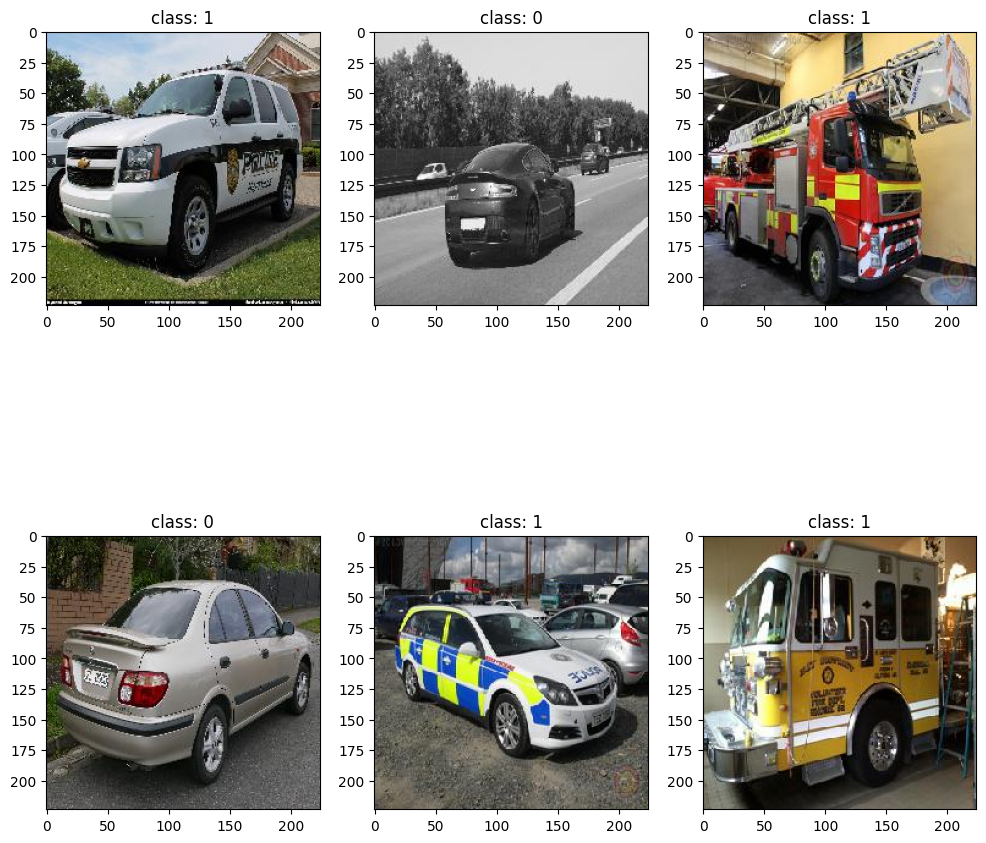

In [ ]:
# prompt: visualize 6 images using a list of images and matplotlib

import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(train_images[i])

  plt.title(f"class: {train_labels[i]}")
plt.show()


## Normalisation et Repartition des données en train et test

In [ ]:
images = read_images('/content/Dataset/images')
images_names = get_names('/content/Dataset/images')


In [ ]:
# prompt: choose  a sample of index from a list of index

images = np.array(images)

In [ ]:
images = images.reshape(images.shape[0],-1)

In [ ]:
print(images.shape)

(2352, 150528)


In [ ]:

labels = np.array(get_labels(images_names)).reshape(-1,1)


In [ ]:
print(labels.shape)
print(images.shape)

(2352, 1)
(2352, 150528)


In [ ]:
images = images/images.max()

In [ ]:
# prompt: train_test_split sklearn


x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2,random_state=123,shuffle=True)


In [ ]:
x_train[0].shape[0]

150528

In [ ]:
del images

In [ ]:
del labels

### Configuration du Early stopping avec Keras



*   On surveille la validation loss
*   Le seuil est de 0.01
*   Regarder si la validation loss ne varie plus au bout de 5 epochs
* le mode signifie la fonction que nous voulons appliquer au validation loss durant le training et ici c'est la minimisation



In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = "val_loss",min_delta=0.01,patience=5,mode = "min")

## Construire le modele

In [ ]:
from keras.models import Sequential
from keras.layers import InputLayer, Dense

In [ ]:

model = Sequential()
model.add(InputLayer(x_train[0].shape[0]),)
model.add(Dense(units = 20,activation='relu'))
model.add(Dense(units = 10,activation='relu'))
model.add(Dense(units = 1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                3010580   
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 3010801 (11.49 MB)
Trainable params: 3010801 (11.49 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compiler le modele

In [ ]:
model.compile(optimizer='adam',loss=keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

## Entrainer le modele

In [ ]:
import tensorflow as tf
#losses = tf.keras.losses.BinaryCrossentropy()

model_history = model.fit(x_train,y_train,epochs = 15,validation_data=(x_test,y_test),batch_size=64,callbacks=(early_stopping))

Epoch 1/15
30/30 [==============================] - 6s 158ms/step - loss: 8.1156 - accuracy: 0.5683 - val_loss: 2.7686 - val_accuracy: 0.6327
Epoch 2/15
30/30 [==============================] - 3s 95ms/step - loss: 1.3971 - accuracy: 0.6624 - val_loss: 0.8730 - val_accuracy: 0.6773
Epoch 3/15
30/30 [==============================] - 3s 98ms/step - loss: 0.8053 - accuracy: 0.7060 - val_loss: 1.2644 - val_accuracy: 0.5987
Epoch 4/15
30/30 [==============================] - 3s 102ms/step - loss: 1.3818 - accuracy: 0.6672 - val_loss: 3.3279 - val_accuracy: 0.5563
Epoch 5/15
30/30 [==============================] - 4s 151ms/step - loss: 0.8805 - accuracy: 0.7379 - val_loss: 0.7847 - val_accuracy: 0.6943
Epoch 6/15
30/30 [==============================] - 3s 97ms/step - loss: 0.6854 - accuracy: 0.7485 - val_loss: 0.9956 - val_accuracy: 0.6730
Epoch 7/15
30/30 [==============================] - 3s 92ms/step - loss: 0.3544 - accuracy: 0.8575 - val_loss: 0.8164 - val_accuracy: 0.6539
Epoch 8/15

## Evaluation des predictions du modele

In [ ]:
# prompt: Evaluate model predictions

class_pred = np.where(model.predict(x_test)[:,0] > 0.5,1,0)
prob_pred = model.predict(x_test)[:,0]


15/15 [==============================] - 0s 15ms/step


In [ ]:
from sklearn.metrics import accuracy_score
print(f"accuracy sur les données de test: {accuracy_score(class_pred,y_test)}")


accuracy sur les données de test: 0.7176220806794055


In [ ]:
loss,auc = model.evaluate(x_test,y_test)

15/15 [==============================] - 0s 20ms/step - loss: 0.6540 - accuracy: 0.7176


In [ ]:
type(model_history)

keras.src.callbacks.History

In [ ]:
model_history.history

{'loss': [8.115570068359375,
  1.3971041440963745,
  0.8052783608436584,
  1.3818057775497437,
  0.8805155754089355,
  0.6853862404823303,
  0.354365736246109,
  0.38762280344963074,
  0.3555459976196289,
  0.5496619939804077,
  0.5950008034706116,
  0.7412163019180298,
  0.4296691119670868],
 'accuracy': [0.5683147311210632,
  0.6624135971069336,
  0.7060074210166931,
  0.6671983003616333,
  0.7379053831100464,
  0.7485380172729492,
  0.8575226068496704,
  0.8208400011062622,
  0.8447633981704712,
  0.7729930877685547,
  0.7634236812591553,
  0.7458798289299011,
  0.8234981298446655],
 'val_loss': [2.768554210662842,
  0.8730424046516418,
  1.2643908262252808,
  3.327885150909424,
  0.7846548557281494,
  0.9956184029579163,
  0.8164354562759399,
  0.5812952518463135,
  0.6222724914550781,
  1.0316104888916016,
  1.7700886726379395,
  1.0560238361358643,
  0.6539944410324097],
 'val_accuracy': [0.6326963901519775,
  0.6772823929786682,
  0.5987260937690735,
  0.556263267993927,
  0.694

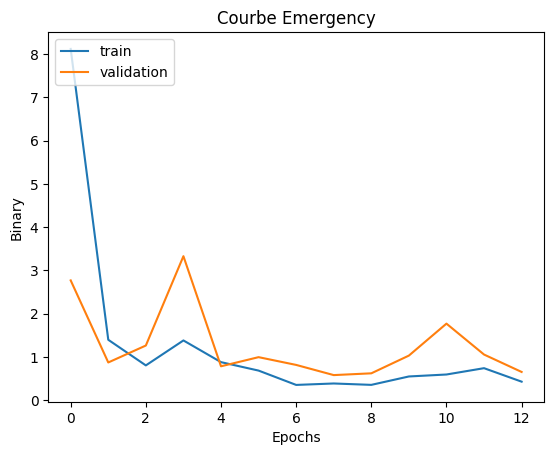

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Courbe Emergency")
plt.xlabel("Epochs")
plt.ylabel("Binary")
plt.legend(['train','validation'],loc='upper left')
plt.show()

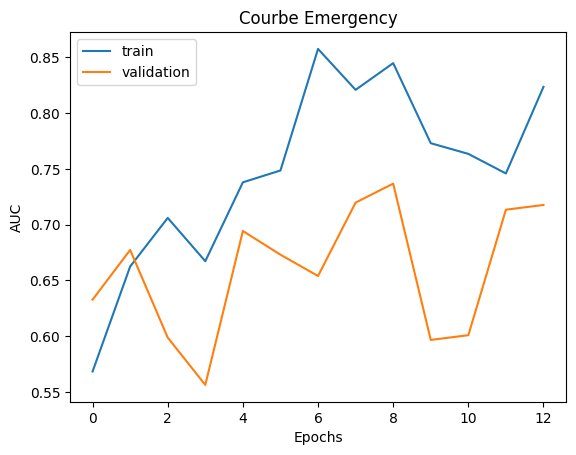

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("Courbe Emergency")
plt.xlabel("Epochs")
plt.ylabel("AUC")
plt.legend(['train','validation'],loc='upper left')
plt.show()

### Voir les resultats d'une prediction

In [ ]:
import random
index  = random.choice(range(len(x_test)))
vehicle = x_test[index].reshape(224,224,3)

In [ ]:
prob = prob_pred[index]
label = y_test[index]

Text(0.5, 1.0, 'Probabilite vehicule urgence estimée à: 0.9987491369247437 par le modele. Sa classe est [1]')

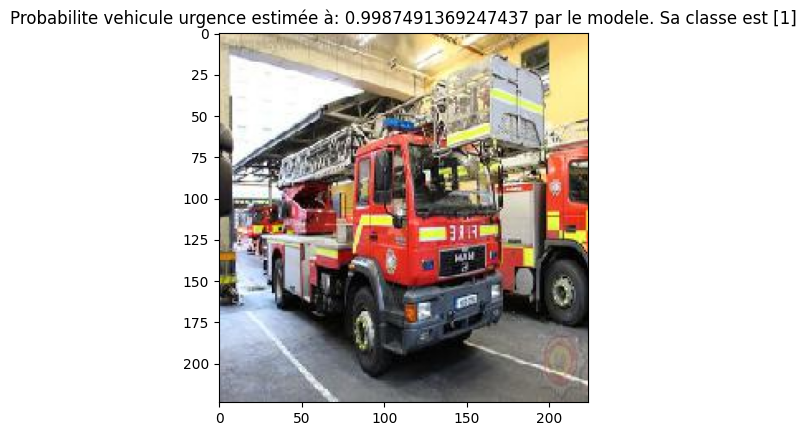

In [ ]:
plt.imshow(vehicle)

plt.title(f"Probabilite vehicule urgence estimée à: {prob} par le modele. Sa classe est {label}")

In [ ]:
del vehicle
del model_history

In [ ]:
del index
del prob_pred
del class_pred

### Creation d'une classe pour eviter de repeter les codes

In [ ]:
class RunModel:
  def __init__(self,model,optimizer,loss,metrics,epochs,batch_size,callbacks_values):
    """
    callbacks_values est utilise pour le early stopping
    """
    self.model = model
    self.optimizer = optimizer
    self.loss = loss
    self.metrics = metrics
    self.epochs = epochs
    self.batch_size = batch_size

  def compile(self):
    self.model.compile(optimizer = self.optimizer,loss = self.loss,metrics = [self.metrics])

  def fit(self,x_train,y_train,x_test,y_test):
    return self.model.fit(x_train,y_train,epochs = self.epochs,validation_data=(x_test,y_test),batch_size=self.batch_size,callbacks=callbacks_values)




  def evaluate(self,x_test,y_test):
    class_pred = np.where(self.model.predict(x_test)[:,0] > 0.5,1,0)
    prob_pred = self.model.predict(x_test)[:,0]
    return self.model.evaluate(x_test,y_test)

  def visualisation(self,model_history,visualise_loss = True):
    if visualise_loss == True:
      plt.plot(model_history.history['loss'])
      plt.plot(model_history.history['val_loss'])
      plt.title("Courbe Emergency")
      plt.xlabel("Epochs")
      plt.ylabel("Binary")
      plt.legend(['train','validation'],loc='upper left')
      plt.show()
    else:
      plt.plot(model_history.history[self.metrics])
      plt.plot(model_history.history['val_'+self.metrics])
      plt.title("Courbe Emergency")
      plt.xlabel("Epochs")
      plt.ylabel("Binary")
      plt.legend(['train','validation'],loc='upper left')
      plt.show()




'\nclass RunModel:\n  def __init__(self,model,optimizer,loss,metrics,epochs,batch_size):\n    self.model = model\n    self.optimizer = optimizer\n    self.loss = loss\n    self.metrics = metrics\n    self.epochs = epochs\n    self.batch_size = batch_size\n\n  def compile(self):\n    self.model.compile(optimizer = self.optimizer,loss = self.loss,metrics = [self.metrics])\n\n  def fit(self,x_train,y_train,x_test,y_test):\n    return self.model.fit(x_train,y_train,epochs = self.epochs,validation_data=(x_test,y_test),batch_size=self.batch_size)\n  \n\n\n\n  def evaluate(self,x_test,y_test):\n    class_pred = np.where(self.model.predict(x_test)[:,0] > 0.5,1,0)\n    prob_pred = self.model.predict(x_test)[:,0]\n    return self.model.evaluate(x_test,y_test)\n\n  def visualisation(self,model_history,visualise_loss = True):\n    if visualise_loss == True:\n      plt.plot(model_history.history[\'loss\'])\n      plt.plot(model_history.history[\'val_loss\'])\n      plt.title("Courbe Emergency")\n  